In [11]:
import numpy as np

# Load the MNIST-100 dataset from the .npz file
mnist_data = np.load('image classification/mnist_compressed.npz')

# Check the dataset's keys to ensure correct loading
print(mnist_data.files)  # Expected: 'train_images', 'train_labels', 'test_images', 'test_labels'

# Load the data
x_train = mnist_data['train_images']
y_train = mnist_data['train_labels']
x_test = mnist_data['test_images']
y_test = mnist_data['test_labels']

# Check the shapes of the loaded data
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


['train_images', 'train_labels', 'test_images', 'test_labels']
x_train shape: (60000, 28, 56), y_train shape: (60000,)
x_test shape: (10000, 28, 56), y_test shape: (10000,)


In [12]:
from tensorflow.keras.utils import to_categorical

# Resize images to ensure they're the correct shape (28, 56, 1) for the model
x_train = x_train.reshape(-1, 28, 56, 1)
x_test = x_test.reshape(-1, 28, 56, 1)

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels for 100 classes
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Check shapes after preprocessing
print(f"x_train shape after preprocessing: {x_train.shape}")
print(f"y_train shape after one-hot encoding: {y_train.shape}")


x_train shape after preprocessing: (60000, 28, 56, 1)
y_train shape after one-hot encoding: (60000, 100)


In [13]:
from tensorflow.keras import layers, models

def build_model(input_shape=(28, 56, 1)):
    model = models.Sequential()
    
    # Add Conv2D layers with max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the output of the last Conv2D layer and pass it through Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    
    # Output layer with 100 classes
    model.add(layers.Dense(100, activation='softmax'))
    
    return model

# Build the model
model = build_model(input_shape=(28, 56, 1))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 54, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 12, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 10, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,620 (732.89 KB)

 Trainable params: 187,620 (732.89 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 54ms/step - accuracy: 0.5256 - loss: 1.9626 - val_accuracy: 0.9381 - val_loss: 0.2027
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9440 - loss: 0.1804 - val_accuracy: 0.9568 - val_loss: 0.1347
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9678 - loss: 0.1046 - val_accuracy: 0.9594 - val_loss: 0.1303
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9797 - loss: 0.0654 - val_accuracy: 0.9639 - val_loss: 0.1165
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.9669 - val_loss: 0.1083
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9874 - loss: 0.0361 - val_accuracy: 0.9685 - val_loss: 0.1074
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9906 - loss: 0.0266 - val_accuracy: 0.9663 - val_loss: 0.1312
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9927 - loss: 0.0225 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


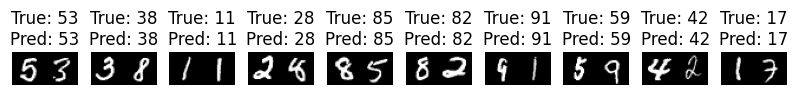

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions for the test set
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Number of images to display
num_images = 10

# Plot some images with predicted and actual labels
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28, 56), cmap='gray')  # Reshape to 28x56 for visualization
    plt.title(f"True: {y_true_labels[i]}\nPred: {y_pred_labels[i]}")
    plt.axis('off')

plt.show()
